In [252]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [299]:
# Import Data and reconfigure columns names
df = pd.read_csv('C:/Users/dmitr/Documents/Work/Projects/Data Camp/finch_beaks.csv', header = 1, usecols = np.arange(1,5))
df = df.rename(columns={"beak length (mm)": "beak_length", "beak depth (mm)": "beak_depth"})
df.head()

,species,beak_length,beak_depth,year
0,fortis,9.25,8.05,1973
1,fortis,11.35,10.45,1973
2,fortis,10.15,9.55,1973
3,fortis,9.95,8.75,1973
4,fortis,11.55,10.15,1973


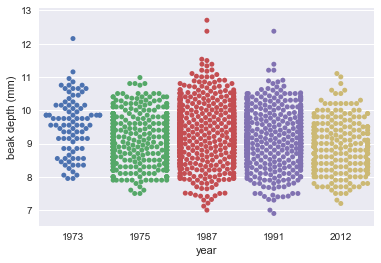

In [301]:
# EDA of beak depths of Darwin's finches

_ = sns.swarmplot(data = df, x = 'year', y = 'beak_depth')
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
plt.show()

In [302]:
# Lets focus on 2 furthest sets of years from each other with heavy content of data to best understand evolution

df1 = df[df['year'].isin([1975,2012])]
print(df1['year'].unique(),df1['species'].unique())

[1975 2012] ['fortis' 'scandens']


In [287]:
def ecdf(data):
    '''Function for Empirical Cumulative Distribution Function (ECDF)'''
    x = np.sort(data)
    return x, x.cumsum()/np.sum(x)

In [416]:
# Let us observe how Scandens' beaks have changed over time

bd_1975 = np.array(df1[df1['year'].isin([1975]) & df1['species'].isin(['scandens'])].beak_depth)
bd_2012 = np.array(df1[df1['year'].isin([2012]) & df1['species'].isin(['scandens'])].beak_depth)
bl_1975 = np.array(df1[df1['year'].isin([1975]) & df1['species'].isin(['scandens'])].beak_length)
bl_2012 = np.array(df1[df1['year'].isin([2012]) & df1['species'].isin(['scandens'])].beak_length)

In [417]:
df1.groupby(['year','species']).mean()

beak_length  beak_depth
year species                          
1975 fortis      10.565190    9.171646
     scandens    14.120920    8.960000
2012 fortis      10.517355    8.605372
     scandens    13.421024    9.186220

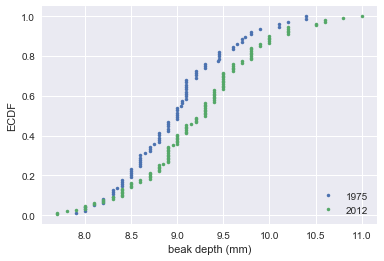

In [418]:
# Plot ECDFs for beek depth of Scandens

x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

_ = plt.plot(x_1975, y_1975, marker = '.', linestyle = 'none')
_ = plt.plot(x_2012, y_2012, marker = '.', linestyle = 'none')
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.show()

# Looks like Scandens' depth of beak has increased over time, drought and limitation of easy to crack seeds accounts for this

In [419]:
def draw_bs_reps(data, func, size=1):
    """Generating multiple bootstrap replicates of a test statistic."""      
    vector = np.empty(size)
    
    for i in range(size):
        vector[i] = func(np.random.choice(data,len(data)))
    
    return vector

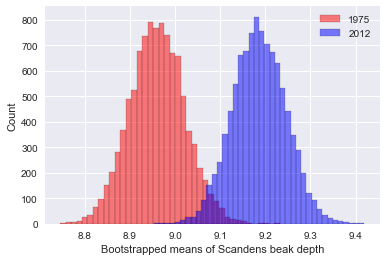

In [420]:
#  10k bootstrap simulations of respective years' means. Beak depth over time has increased.

bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

_ = plt.hist(bs_replicates_1975, bins = 40, alpha = .5, color = 'red', ec='black')
_ = plt.hist(bs_replicates_2012, bins = 40, alpha = .5, color = 'blue', ec='black')

_ = plt.xlabel('Bootstrapped means of Scandens beak depth')
_ = plt.ylabel('Count')
_ = plt.legend(('1975','2012'))
plt.show()

In [421]:
# Function for calculating confidence intervals of test statistic

def confint(data,n):
    """Find percentile of data."""  
    return np.percentile(data,[(100 - n)/2,(100 - n)/2 + n])

In [422]:
# Find difference in Bootstrapped (BS) means of beak depth over time and respective confidence intervals

mean_diff = np.mean(bd_2012) - np.mean(bd_1975)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

conf_int = confint(bs_diff_replicates,95)

print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.05773948  0.39691316] mm


In [423]:
# Produce multiple linear regression slope/intercept combinations 

def draw_bs_pairs_linreg(x, y, size = 1):
    """Perform linear regression on pairs of bootstrapped data and obtain slope intercept pairs."""  
    m = np.empty(size)
    b = np.empty(size)
    inds_comp = np.arange(len(x))
    
    for i in range(size):
        inds = np.random.choice(inds_comp, size = len(x))
        x = x[inds]
        y = y[inds] 
        m[i], b[i] = np.polyfit(x, y, 1)
    
    return m,b

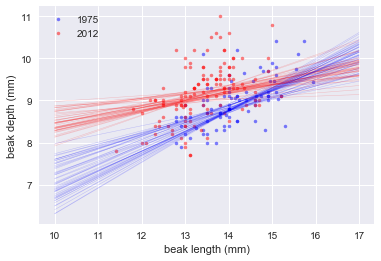

In [431]:
# EDA of beak length and depth over time

x = np.array([10, 17])

m_1975, b_1975 = np.polyfit(bl_1975,bd_1975,1)
m_2012, b_2012 = np.polyfit(bl_2012,bd_2012,1)

_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color = 'blue', alpha = 0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color = 'red', alpha = 0.5)

size = 50

m1,b1 = draw_bs_pairs_linreg(bl_1975, bd_1975, size)
m2,b2 = draw_bs_pairs_linreg(bl_2012, bd_2012, size)

for i in range(size):       
    _ = plt.plot(x, m1[i] * x + b1[i], color = 'blue', linewidth=0.5, alpha=0.2)
    _ = plt.plot(x, m2[i] * x + b2[i], color = 'red', linewidth=0.5, alpha=0.2)

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')


plt.show()

# Looks like over time the beaks got deeper but shorter. If anything, they changed shape

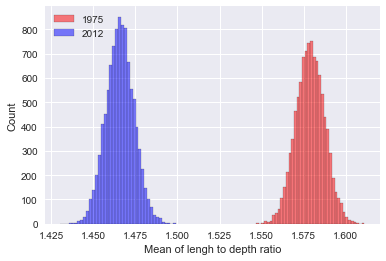

In [442]:
# The above prompts the question how does the beak shape evolve over time (ratio of depth to length)

ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

_ = plt.hist(bs_replicates_1975, bins = 40, alpha = .5, color = 'red', ec='black')
_ = plt.hist(bs_replicates_2012, bins = 40, alpha = .5, color = 'blue', ec='black')

_ = plt.xlabel('Mean of lengh to depth ratio')
_ = plt.ylabel('Count')
_ = plt.legend(('1975', '2012'), loc='upper left')

# From EDA alone it is fairly visible that the ratios of length to depth of beaks changed over time, and by the distance of distributions this was no accident. 
# We could have futherer confirmed this using t test hypothesis testing by setting null hypothesis to state that both means of ratios are the same and seeing if the p value is significant, but in this case EDA suffices

In [491]:
# Observe Heritability of Scandens and Fortis

bd_parent_scandens = np.array(df1[df1['year'].isin([1975]) & df1['species'].isin(['scandens'])].beak_depth)
bd_offspring_scandens = np.array(df1[df1['year'].isin([2012]) & df1['species'].isin(['scandens'])].beak_depth)
bd_parent_fortis = np.array(df1[df1['year'].isin([1975]) & df1['species'].isin(['fortis'])].beak_length)
bd_offspring_fortis = np.array(df1[df1['year'].isin([2012]) & df1['species'].isin(['fortis'])].beak_length)

min_scandens = np.min([len(bd_parent_scandens),len(bd_offspring_scandens)])
min_fortis = np.min([len(bd_parent_fortis),len(bd_offspring_fortis)])
print(min_scandens,min_fortis)

87 121


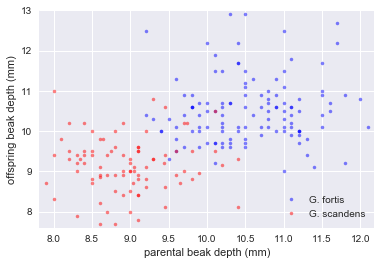

In [499]:
# Plot offspring to parent relationship beak depth. I defined offspring as 2012 generation and parents as 1975
# Can we identify any relationships between parents and their kids in respect to beak depth?


bd_parent_scandens = bd_parent_scandens[:min_scandens]
bd_offspring_scandens = bd_offspring_scandens[:min_scandens]
bd_parent_fortis = bd_parent_fortis[:min_fortis]
bd_offspring_fortis = bd_offspring_fortis[:min_fortis]

_ = plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='.', linestyle='none', color='blue', alpha=.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='.', linestyle='none', color='red', alpha=.5)

_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

plt.margins(.02)

plt.show()

# There seems to be a good level of correlation between parents and offspring in beak depth

In [ ]:
# Future analysis may entail finding correlation between parent and offspring beak depth. 
# You would do this by mxing up the parent order while maintaining the offspring order in the value pairs and then finding the correlation statistic from bootstrapped samples.
# Then the observed correlation may be used to calculate p value and find the significance of heritability.